In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
file_path = "Unemployment in India.csv"  
df = pd.read_csv(file_path)

In [16]:
print("Original Columns:", df.columns.tolist())

Original Columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [17]:
df.columns = df.columns.str.strip()
print("Cleaned Columns:", df.columns.tolist())

Cleaned Columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']


In [18]:
df.columns = df.columns.str.strip()
print("Cleaned Columns:", df.columns.tolist())

Cleaned Columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']


In [19]:
if 'Date' not in df.columns:
    raise KeyError("Column 'Date' not found. Available columns: " + ", ".join(df.columns))

In [20]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\dhrut\AppData\Local\Temp\ipykernel_7528\242626680.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [22]:
df = df.dropna(subset=['Date'])

In [23]:
sns.set_style("whitegrid")

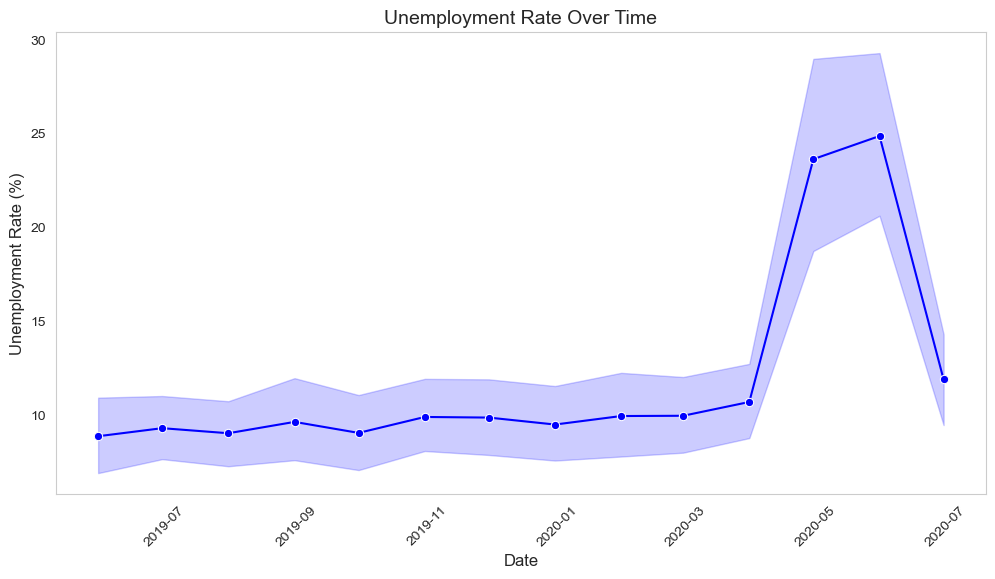

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o', color='blue')
plt.title('Unemployment Rate Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\dhrut\AppData\Local\Temp\ipykernel_7528\2026050198.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




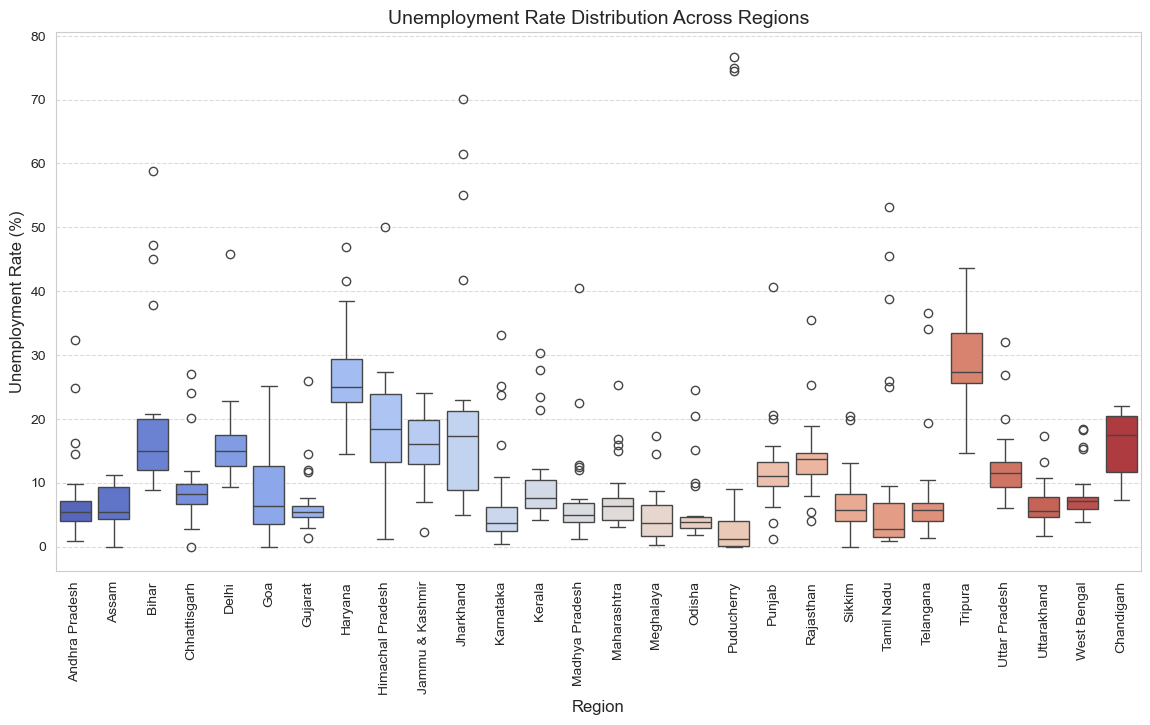

In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Unemployment Rate Distribution Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

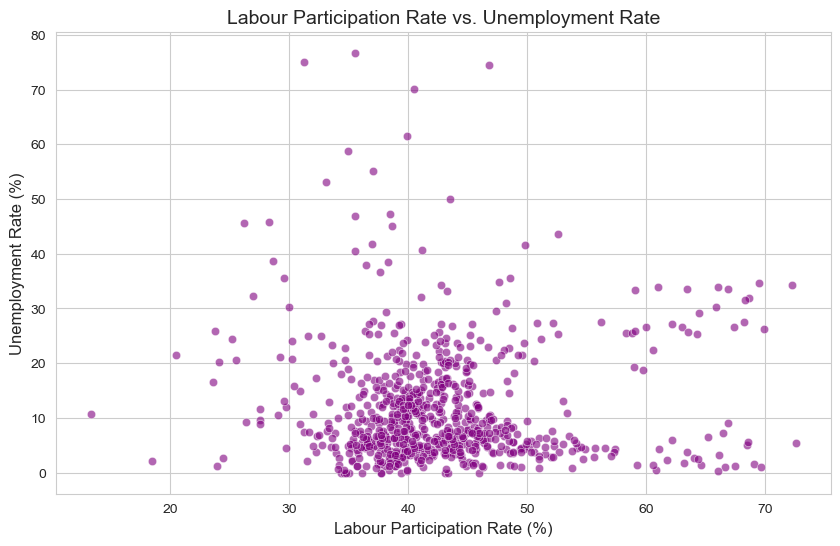

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', alpha=0.6, color='purple')
plt.title('Labour Participation Rate vs. Unemployment Rate', fontsize=14)
plt.xlabel('Labour Participation Rate (%)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

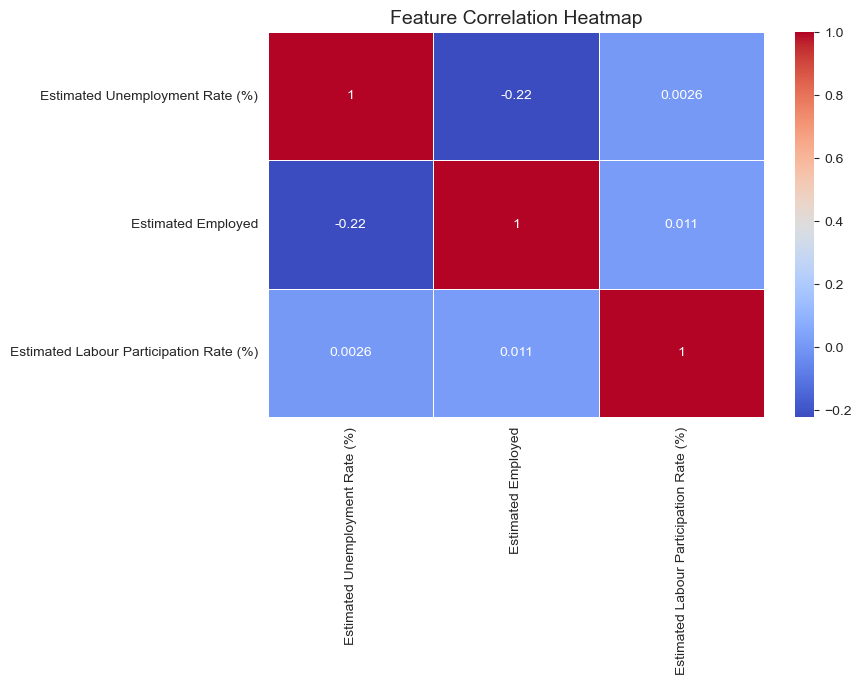

In [27]:
plt.figure(figsize=(8, 5))
# Use numeric_only to avoid non-numeric columns
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

In [28]:
df['Date_Ordinal'] = df['Date'].map(lambda x: x.toordinal())

In [29]:
X = df[['Date_Ordinal']]
y = df['Estimated Unemployment Rate (%)']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
df['Predicted_Unemployment'] = model.predict(X)

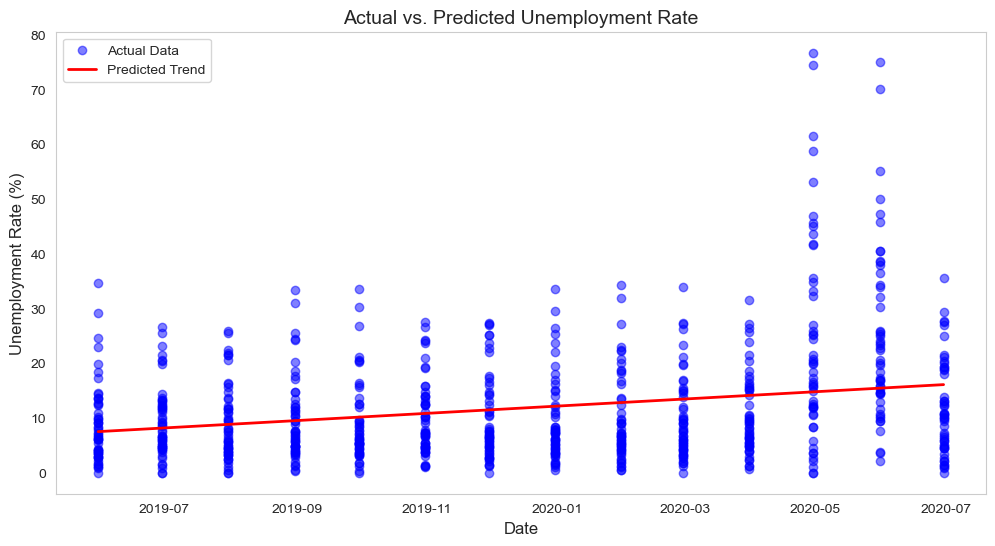

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Estimated Unemployment Rate (%)'], label='Actual Data', color='blue', alpha=0.5)
plt.plot(df['Date'], df['Predicted_Unemployment'], label='Predicted Trend', color='red', linewidth=2)
plt.title('Actual vs. Predicted Unemployment Rate', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

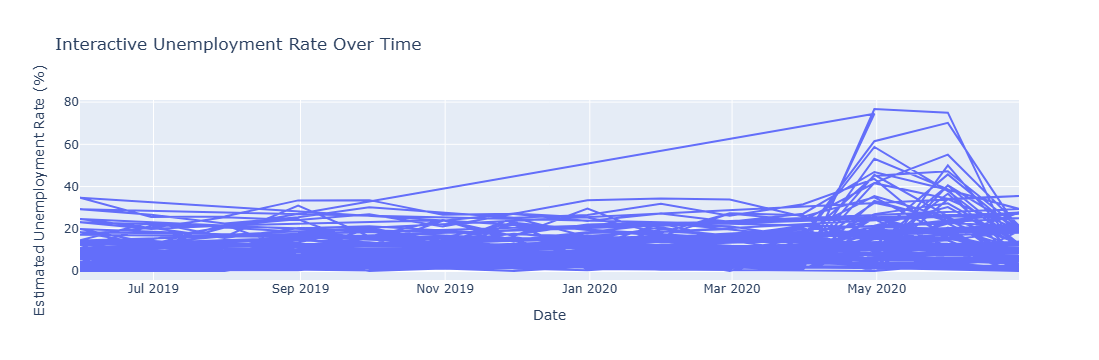

In [34]:
fig = px.line(df, x='Date', y='Estimated Unemployment Rate (%)', title='Interactive Unemployment Rate Over Time')
fig.show()